# END TO END HEART DISEASE PREDICTION
    This end to end machine learning project predicts if a person has heart disease or not based 
    on their medical attributes, 
    various data science and machine learning libraries

..............................................................................................................................................................................................................................................................

## Preparing the tools
        We are going to use pandas, numpy, matplotlib for data analysis and classification
        and scikit-learn for the logistic regression model to create a binary model for 
        prediction.

## Data Dictionary

age - age in years<br>
sex - (1 = male; 0 = female)<br>
cp - chest pain type<br>
0: Typical angina: chest pain related decrease blood supply to the heart<br>
1: Atypical angina: chest pain not related to heart<br>
2: Non-anginal pain: typically esophageal spasms (non heart related)<br>
3: Asymptomatic: chest pain not showing signs of disease<br>
trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern<br>
chol - serum cholestoral in mg/dl<br>
serum = LDL + HDL + .2 * triglycerides<br>
above 200 is cause for concern<br>
fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)<br>
'>126' mg/dL signals diabetes<br>
restecg - resting electrocardiographic results<br>
0: Nothing to note<br>
1: ST-T Wave abnormality<br>
can range from mild symptoms to severe problems<br>
signals non-normal heart beat<br>
2: Possible or definite left ventricular hypertrophy<br>
Enlarged heart's main pumping chamber<br>
thalach - maximum heart rate achieved<br>
exang - exercise induced angina (1 = yes; 0 = no)<br>
oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more<br>
slope - the slope of the peak exercise ST segment<br>
0: Upsloping: better heart rate with excercise (uncommon)<br>
1: Flatsloping: minimal change (typical healthy heart)<br>
2: Downslopins: signs of unhealthy heart<br>
ca - number of major vessels (0-3) colored by flourosopy<br>
colored vessel means the doctor can see the blood passing through<br>
the more blood movement the better (no clots)<br>
thal - thalium stress result<br>
1,3: normal<br>
6: fixed defect: used to be defect but ok now<br>
7: reversable defect: no proper blood movement when excercising<br>
target - have disease or not (1=yes, 0=no) (= the predicted attribute)<br>

In [1]:
#importing all the important tools

#data analysis and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To view our plots inside the notebook
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# tools for model evaluation
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import plot_roc_curve

## loading the dataset

In [2]:
df=pd.read_csv("heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# lets find out how many of each class is present in the dataset
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

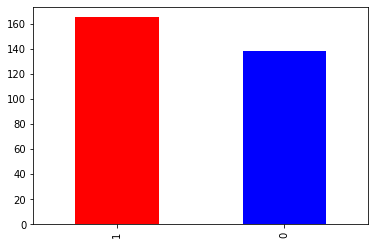

In [4]:
# lets visualize the two class in a bar chart
df.target.value_counts().plot(kind="bar",color=["red","blue"]);

In [5]:
# lets see if there's any missing value in the dataset
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
# lets see the trend of heart disease with gender
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


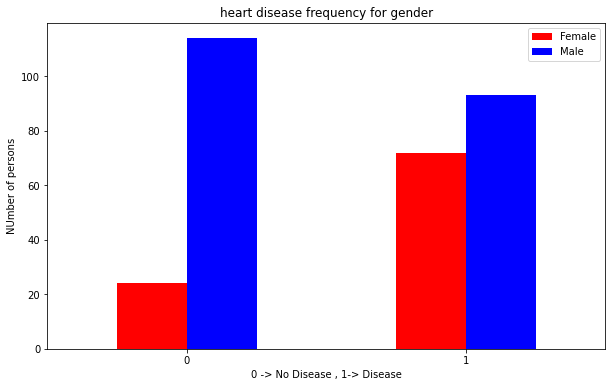

In [8]:
#visualizing the trend
pd.crosstab(df.target,df.sex).plot(kind="bar",
                                   figsize=(10,6),
                                   color=["red","blue"]);
plt.legend(["Female","Male"])
plt.title("heart disease frequency for gender")
plt.xlabel("0 -> No Disease , 1-> Disease")
plt.ylabel("NUmber of persons")
plt.xticks(rotation=0);

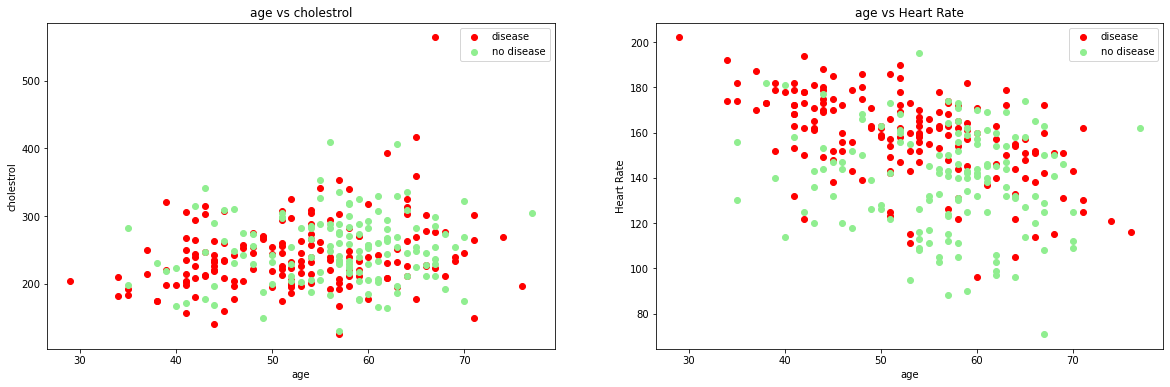

In [9]:
# lets visualize for cholestrol with age and heart rate with age in two subplots
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(20,6))

#cholestrol vs age

# plotting for disease
ax1.scatter(df.age[df.target==1],df.chol[df.target==1],c="red")
# plotting for no disease
ax1.scatter(df.age[df.target==0],df.chol[df.target==0],c="lightgreen")
ax1.set(title="age vs cholestrol",xlabel="age",ylabel="cholestrol")
ax1.legend(["disease","no disease"])

#Heart Rate vs age

# plotting for disease
ax2.scatter(df.age[df.target==1],df.thalach[df.target==1],c="red")
# plotting for no disease
ax2.scatter(df.age[df.target==0],df.thalach[df.target==0],c="lightgreen")
ax2.set(title="age vs Heart Rate",xlabel="age",ylabel="Heart Rate")
ax2.legend(["disease","no disease"]);

<AxesSubplot:ylabel='Frequency'>

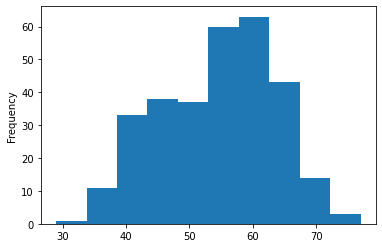

In [10]:
# distribution of the age in the data
df.age.plot.hist()

### Heart disease frequency per chest pain type
cp - chest pain type<br>
0: Typical angina: chest pain related decrease blood supply to the heart<br>
1: Atypical angina: chest pain not related to heart<br>
2: Non-anginal pain: typically esophageal spasms (non heart related)<br>
3: Asymptomatic: chest pain not showing signs of disease<br>

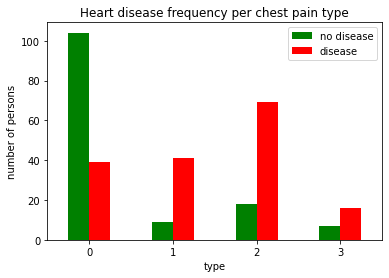

In [11]:
pd.crosstab(df.cp,df.target).plot(kind="bar",color=["green","red"]);
plt.xlabel("type")
plt.ylabel("number of persons")
plt.legend(["no disease","disease"])
plt.title("Heart disease frequency per chest pain type")
plt.xticks(rotation=0);

## Checking the dependencies between the colums using the correlation matrix

In [12]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


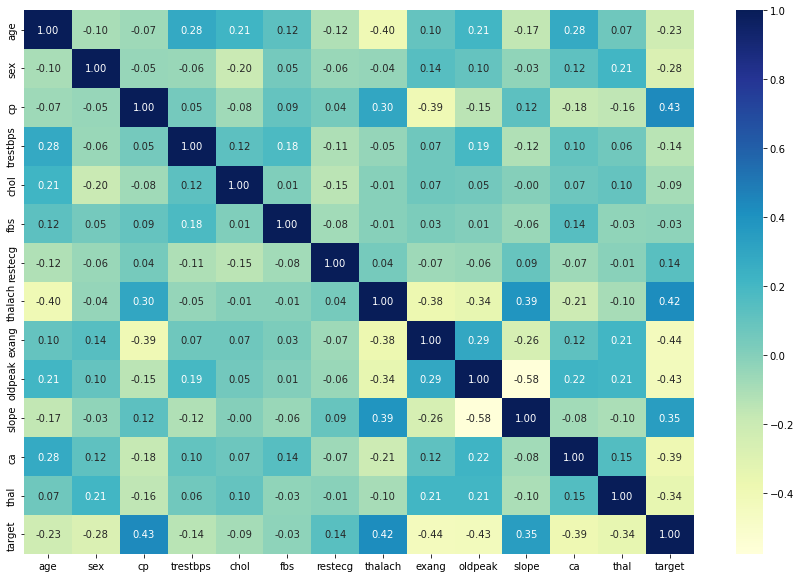

In [13]:
#visualizing the correlation matrix
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
               annot=True,
               fmt=".2f",
               cmap="YlGnBu");

In [14]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### now as we have understood the dataset, lets split it into input and output, since it is a classification problem
x -> input
<br>
y -> output

In [15]:
x=df.drop("target",axis=1)
y=df.target

In [16]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [17]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

### lets split the input and output data for training and testing

In [18]:
np.random.seed(42)
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2)

In [19]:
len(x_train), len(y_train)

(242, 242)

In [20]:
len(x_test),len(y_test)

(61, 61)

In [21]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


In [22]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

## Applying Machine Learning Models
we will be applying various classification models and see which have better accuracy<br>

we will be using : <br>
1. Logistic Regression<br>
2. K Nearest Neighbour<br>
3. Random Forest

In [23]:
# making a dictionary to put all the models
models = { "logistic regression":LogisticRegression(),
           "KNN":KNeighborsClassifier(),
           " Random Forest":RandomForestClassifier()}

# making a function which will train and test our data on all models

def train_test_check(models,x_train,x_test,y_train,y_test):
    
    #setting random seed
    np.random.seed(42)
    
    #making a empty dictionary which will score all the model score
    model_score={}
    
    #Iterating through all the models to train and test
    
    for name,model in models.items():
        model.fit(x_train,y_train)
        model_score[name]=model.score(x_test,y_test)
    return model_score


In [24]:
#calling the function and displaying the scores
model_score=train_test_check(models,
                             x_train,
                             x_test,
                             y_train,
                             y_test)
model_score

C:\Users\sayan\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'logistic regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 ' Random Forest': 0.8360655737704918}

### Visualizing the accuracy of the models

In [25]:
model_compare=pd.DataFrame(model_score,index=["Accuracy"])
model_compare

,logistic regression,KNN,Random Forest
Accuracy,0.885246,0.688525,0.836066


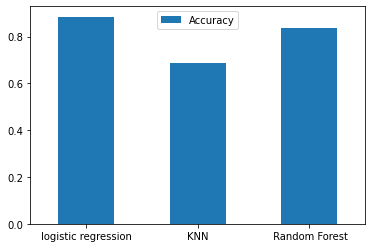

In [26]:
model_compare.T.plot.bar()
plt.xticks(rotation=0);

## lets make some changes in our models and see if there's is an increase in accuracy

we will be seeing:<br>
* Hyperparameter tuning
* Feature importance
* Confusion Matrix
* Cross-Validation
* Precision
* Recall
* F1 score
* Classification report
* Roc curve
* Area under the curve (AUC)

### Hyperparameter tuning

In [27]:
#Lets tune KNN

train_scores=[]
test_scores=[]

#create a list of different values for n_neighbours
neighbors=range(1,21)

#setup knn instance
knn=KNeighborsClassifier()

#iterate trough different neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    #fit the model
    knn.fit(x_train,y_train)
    
    #update training score list
    train_scores.append(knn.score(x_train,y_train))
    
    #updationg test score
    test_scores.append(knn.score(x_test,y_test))

In [28]:
train_scores


[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [29]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data : 75.41%


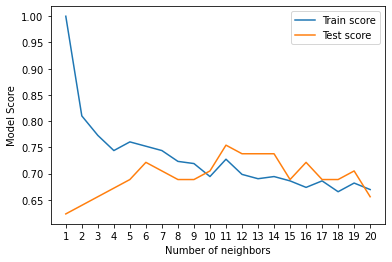

In [30]:
#lets visulaze the scores
plt.plot(neighbors,train_scores,label="Train score")
plt.plot(neighbors,test_scores,label="Test score")
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")
plt.legend()
plt.xticks(np.arange(1,21,1))
print(f"Maximum KNN score on the test data : {max(test_scores)*100:.2f}%")

therefore there is increase in accuracy in KNN model from 68.85% to 75.41%, But it still less than the logistic regression model

## hyperparameter tuning of Logistic Regression and Random Forest Model using Randomized  Search cv (cross validation)

In [31]:
# creating a hyperparameter grid for logistic Regression
log_reg_grid= {"C": np.logspace(-4,4,30),
               "solver": ["liblinear"]}

# Creating a hyperparameter grid for Random Forest Classifier
rf_grid={"n_estimators":np.arange(10,1000,50),
         "max_depth": [None, 3, 5, 10],
         "min_samples_split": np.arange(2,20,2),
         "min_samples_leaf":np.arange(1,20,2)}

In [32]:
# tuning LOgistic Regression

np.random.seed(42)

#setting up random hyperparameter search for logistic regression
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                              param_distributions=log_reg_grid,
                              cv=5,
                              n_iter=20,
                             verbose=True)
#fit random hyperparameter
rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [33]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.20433597178569418}

In [34]:
#checking the new score
rs_log_reg.score(x_test,y_test)

0.8852459016393442

### its nearly same as we have got in first time



In [35]:
# tuning Random Forest

np.random.seed(42)

#setting up random hyperparameter search for Random Forest
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                              param_distributions=rf_grid,
                              cv=5,
                              n_iter=20,
                             verbose=True)
#fit random hyperparameter
rs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [36]:
# checking the best parameter
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [37]:
#checking the score
rs_rf.score(x_test,y_test)

0.8688524590163934

## old vs new accuracy

In [38]:
#Old score
model_score

{'logistic regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 ' Random Forest': 0.8360655737704918}

In [39]:
#new score
print(f"logistic regression: {rs_log_reg.score(x_test,y_test)}, KNN {max(test_scores)},Random Forest {rs_rf.score(x_test,y_test)}")

logistic regression: 0.8852459016393442, KNN 0.7540983606557377,Random Forest 0.8688524590163934


## so as the logistic regression model is giving the higher accuracy, we are going for Logistic Regression




## Evaluating our tuned model using 
* ROC curve and AUC score
* Confusion Matrix
* Classification Report
* Precision 
* Recall
* F1-Score


In [40]:
#Make predictions with tuned model
y_preds = rs_log_reg.predict(x_test)

In [41]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [42]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

C:\Users\sayan\Desktop\heart-disease-project\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


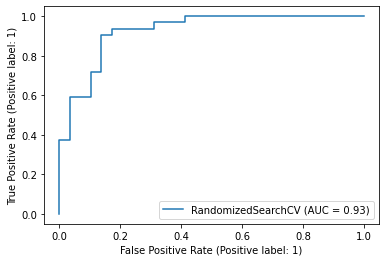

In [43]:
#ploting ROC Curve and calculate Auc metric
plot_roc_curve(rs_log_reg,x_test,y_test);

In [44]:
#confusion matrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


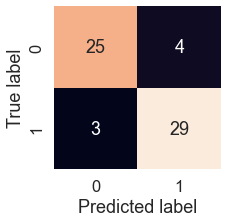

In [45]:
# plotting the confusion matrix using heatmap

sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                   annot=True,
                   cbar=False)
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    
plot_conf_mat(y_test,y_preds)

  ## calculating evaluation metrics using cross validation data

In [46]:
#checking best hyperparameters
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.20433597178569418}

In [47]:
# making a model with best hyperparameter
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

In [50]:
# cross validated accuracy
cv_acc = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [52]:
# cross validated precision
cv_precision = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [54]:
# cross validated recall
cv_recall = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [55]:
# cross validated f1
cv_f1 = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

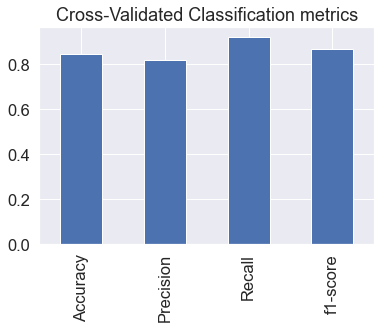

In [60]:
# visualizing creoss-validated metrics

cv_metrics = pd.DataFrame({"Accuracy":cv_acc,
                           "Precision":cv_precision,
                           "Recall":cv_recall,
                           "f1-score":cv_f1},
                           index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Classification metrics",
                      legend=False);

## Feature Importance


In [62]:
#checking coef list of all features
clf.fit(x_train,y_train)
clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [65]:
# creating feature dictionary
feature_dict= dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

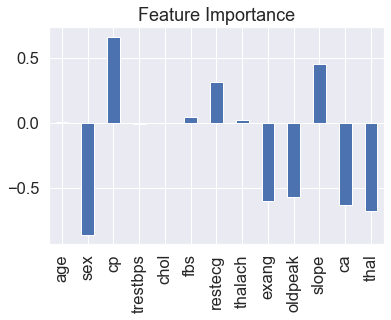

In [66]:
#visualizing feature importance
feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

## so the most important feature in our dataset is cp which denotes 'chest pain'
